<a href="https://colab.research.google.com/github/ai7dnn/2020-Winter-Py-DNN/blob/main/tf%20code/04_mnist_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST 손글씨

In [1]:
import tensorflow as tf
tf.__version__

'2.4.0'

In [2]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
# MNIST 데이터셋을 훈련과 테스트 데이터로 로드하여 준비
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[0]

5

In [7]:
# MNIST 데이터셋을 훈련과 테스트 데이터로 로드하여 준비
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# MNIST 형태를 알아 봅시다. 데이터 수, 행렬 형태 등
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# MNIST 훈련 데이터의 내부 첫 내용도 알아보자.
print(x_train[0])
print(y_train[0])

# MNIST 테스트 데이터의 내부 첫 내용도 알아보자.
print(x_test[0])
print(y_test[0])

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0 

In [9]:
import sys

for x in x_train[0]:
    for i in x:
        sys.stdout.write('%3d' % i)
    sys.stdout.write('\n')

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [11]:
import sys

for x in x_train[1]:
    for i in x:
        print('%3d' % i, end=' ')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 189 253 167   0   0 

In [12]:
y_train[1]

0

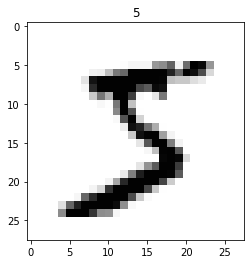

In [16]:
import matplotlib.pyplot as plt

n = 0 #100
ttl = str(y_train[n])
plt.figure(figsize=(6, 4))
plt.title(ttl)
plt.imshow(x_train[n], cmap='Greys')

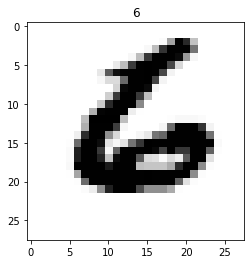

In [17]:
n = len(y_test)-1
ttl = str(y_test[n])
plt.figure(figsize=(6, 4))
plt.title(ttl)
plt.imshow(x_test[n], cmap='Greys')

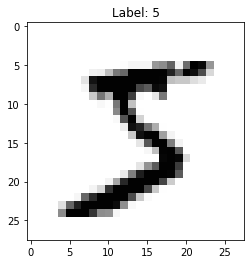

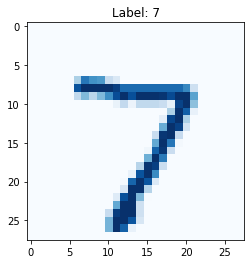

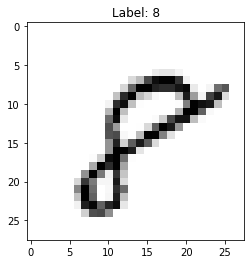

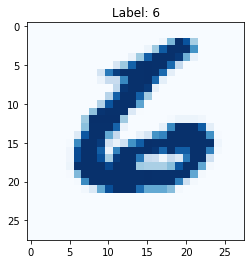

In [18]:
###############################################
# MNIST 데이터(훈련, 테스트)의 내부 첫 내용을 그려보자.
import matplotlib.pyplot as plt

tmp = "Label: " + str(y_train[0])
plt.title(tmp)
plt.imshow(x_train[0], cmap="Greys")
plt.show()

tmp = "Label: " + str(y_test[0])
plt.title(tmp)
plt.imshow(x_test[0], cmap='Blues')
plt.show()

# MNIST 데이터(훈련, 테스트)의 내부 마지막 내용을 그려보자.
idx = len(x_train) - 1
tmp = "Label: " + str(y_train[idx])
plt.title(tmp)
plt.imshow(x_train[idx], cmap="Greys")
plt.show()

idx = len(x_test) - 1
tmp = "Label: " + str(y_test[idx])
plt.title(tmp)
plt.imshow(x_test[idx], cmap='Blues')
plt.show()
###############################################


# 훈련용 데이터 60000 개 중에서 임의 손글씨 출력
## 훈련용 데이터 60000 개 중에서 임의 손글씨 출력하기 위한 첨자 선택

In [19]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

from random import sample
nrows, ncols = 4, 5 #출력 가로 세로 수
# 출력할 첨자 선정
idx = sorted(sample(range(len(x_train)), nrows * ncols)) 
print(idx)

[1106, 1385, 5583, 7994, 8532, 11317, 14422, 17051, 17913, 18367, 23230, 29495, 29900, 33972, 38379, 42366, 49895, 52617, 52936, 52938]


## 훈련용 데이터 60000 개 중에서 4행 5열의 임의 손글씨 출력

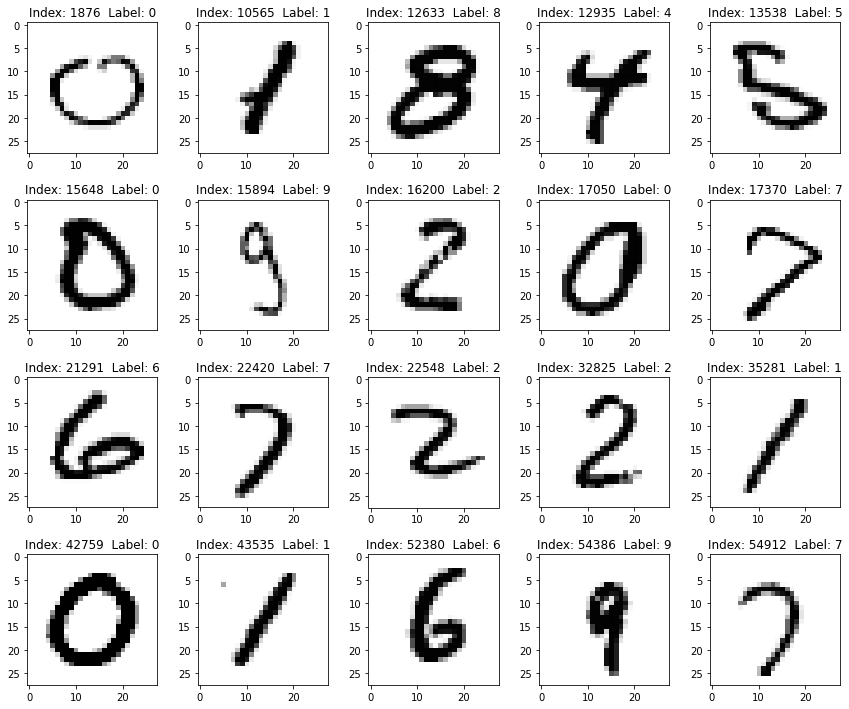

In [20]:
###############################################
#랜덤하게 20개의 훈련용 자료를 그려 보자.
from random import sample

nrows, ncols = 4, 5 #출력 가로 세로 수
idx = sorted(sample(range(len(x_train)), nrows * ncols)) # 출력할 첨자 선정
#print(idx)

count = 0
plt.figure(figsize=(12, 10))

for n in idx:
    count += 1
    plt.subplot(nrows, ncols, count)
    tmp = "Index: " + str(n) + "  Label: " + str(y_train[n])
    plt.title(tmp)
    plt.imshow(x_train[n], cmap='Greys')

plt.tight_layout()
plt.show()
###############################################

# MNIST 손글씨 인공신경망 구현

In [23]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 샘플 값을 정수(0~255)에서 부동소수(0~1)로 변환
x_train, x_test = x_train / 255.0, x_test / 255.0

In [24]:
# 층을 차례대로 쌓아 tf.keras.models.Sequential 모델을 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [25]:
# 모델 요약 표시
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [26]:
# 훈련에 사용할 옵티마이저(optimizer)와 손실 함수, 출력정보를 모델에 설정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              # metrics=['accuracy', 'mse'])

# 모델 요약 표시
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [27]:
# 모델을 훈련 데이터로 총 5번 훈련
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4918 - accuracy: 0.8543
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1523 - accuracy: 0.9565
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1109 - accuracy: 0.9656
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0874 - accuracy: 0.9732
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0758 - accuracy: 0.9772


In [28]:
# 모델을 테스트 데이터로 평가
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0710 - accuracy: 0.9785


[0.07102154195308685, 0.9785000085830688]

## MNIST 딥러닝 전 소스

In [29]:
#########################################################
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 샘플 값을 정수(0~255)에서 부동소수(0~1)로 변환
x_train, x_test = x_train / 255.0, x_test / 255.0

# 층을 차례대로 쌓아 tf.keras.models.Sequential 모델을 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 모델 요약 표시
model.summary()

# 훈련에 사용할 옵티마이저(optimizer)와 손실 함수, 출력정보를 모델에 설정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              # metrics=['accuracy', 'mse'])

# 모델을 훈련 데이터로 총 5번 훈련
model.fit(x_train, y_train, epochs=5)

# 모델을 테스트 데이터로 평가
model.evaluate(x_test, y_test)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4832 - accuracy: 0.8571
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1530 - accuracy: 0.9540
Epoch 3/5
1875/1875 [=======================

[0.0728192925453186, 0.9779999852180481]